In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

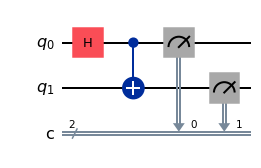

In [2]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

circuit.draw(output='mpl')


/home/henning/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


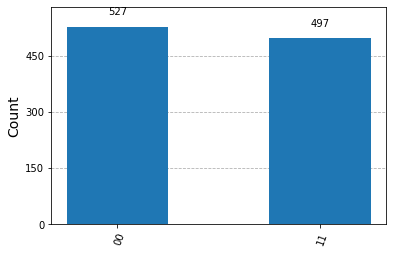

In [3]:
backend = FakeManilaV2()
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

job = sampler.run([isa_circuit])
result = job.result()
pub_result = result[0]

plot_histogram(pub_result.data.c.get_counts())